In [1]:
from siphon.radarserver import RadarServer, get_radarserver_datasets
from datetime import datetime

Get the top-level thredds radar server to find the available dataset

In [2]:
ds = get_radarserver_datasets('http://thredds.ucar.edu/thredds/')

In [3]:
print(list(ds.keys()))

['NEXRAD Level II Radar for Case Study CCS039', 'NEXRAD Level II Radar from IDD', 'NEXRAD Level III Radar for Case Study CCS039', 'NEXRAD Level III Radar from IDD', 'TDWR Level III Radar from IDD']


we are interesting in the NEXRAD LEVEL II data

In [4]:
url = ds['NEXRAD Level II Radar from IDD'].follow().catalog_url
print(url)

http://thredds.ucar.edu/thredds/radarServer/nexrad/level2/IDD/dataset.xml


In [5]:
rs = RadarServer(url)

Find the available stations

In [6]:
rs.stations

{'KABC': Station(id='KABC', elevation=49.0, latitude=60.78, longitude=-161.87, name='ANCHORAGE/Bethel'),
 'KABR': Station(id='KABR', elevation=397.0, latitude=45.45, longitude=-98.4, name='ABERDEEN/Aberdeen'),
 'KABX': Station(id='KABX', elevation=1789.0, latitude=35.13, longitude=-106.82, name='ALBUQUERQUE/Albuquerque'),
 'KACG': Station(id='KACG', elevation=63.0, latitude=56.85, longitude=-135.52, name='JUNEAU/Sitka'),
 'KAEC': Station(id='KAEC', elevation=16.0, latitude=64.5, longitude=-165.28, name='FAIRBANKS/Nome'),
 'KAHG': Station(id='KAHG', elevation=74.0, latitude=60.72, longitude=-151.35, name='ANCHORAGE/Nikiski'),
 'KAIH': Station(id='KAIH', elevation=20.0, latitude=59.45, longitude=-146.3, name='ANCHORAGE/Middleton_Island'),
 'KAKC': Station(id='KAKC', elevation=19.0, latitude=58.67, longitude=-156.62, name='ANCHORAGE/King_Salmon'),
 'KAKQ': Station(id='KAKQ', elevation=34.0, latitude=36.98, longitude=-77.0, name='WAKEFIELD/Wakefield'),
 'KAMA': Station(id='KAMA', elevation

Find the available variables

In [7]:
rs.variables

{'CorrelationCoefficient',
 'DifferentialPhase',
 'DifferentialReflectivity',
 'Reflectivity',
 'SpectrumWidth',
 'Velocity'}

Create a query for certain station and variable

In [8]:
query = rs.query()

In [9]:
query.stations('KFWS').time(datetime.utcnow()).variables('Reflectivity')

var=Reflectivity&time=2017-02-03T18%3A54%3A59.653015&stn=KFWS

In [10]:
rs.validate_query(query)

True

Obtain the the data url that we query

In [11]:
catalog = rs.get_catalog(query)
print(list(catalog.datasets.values())[0])

In [12]:
dss = list(catalog.datasets.values())[0]
dss.access_urls

{'CdmRemote': 'http://thredds.ucar.edu/thredds/cdmremote/nexrad/level2/IDD/KFWS/20170203/Level2_KFWS_20170203_1851.ar2v',
 'HTTPServer': 'http://thredds.ucar.edu/thredds/fileServer/nexrad/level2/IDD/KFWS/20170203/Level2_KFWS_20170203_1851.ar2v',
 'OPENDAP': 'http://thredds.ucar.edu/thredds/dodsC/nexrad/level2/IDD/KFWS/20170203/Level2_KFWS_20170203_1851.ar2v'}

Access the data based on CDMRemote reader

In [13]:
from siphon.cdmr import Dataset
data = Dataset(dss.access_urls['CdmRemote'])

In [14]:
list(data.variables.keys())

['Reflectivity_HI',
 'timeR_HI',
 'elevationR_HI',
 'azimuthR_HI',
 'distanceR_HI',
 'numRadialsR_HI',
 'numGatesR_HI',
 'Reflectivity',
 'timeR',
 'elevationR',
 'azimuthR',
 'distanceR',
 'numRadialsR',
 'numGatesR',
 'RadialVelocity_HI',
 'timeV_HI',
 'elevationV_HI',
 'azimuthV_HI',
 'distanceV_HI',
 'numRadialsV_HI',
 'numGatesV_HI',
 'RadialVelocity',
 'timeV',
 'elevationV',
 'azimuthV',
 'distanceV',
 'numRadialsV',
 'numGatesV',
 'SpectrumWidth_HI',
 'SpectrumWidth',
 'DifferentialReflectivity_HI',
 'timeD_HI',
 'elevationD_HI',
 'azimuthD_HI',
 'distanceD_HI',
 'numRadialsD_HI',
 'numGatesD_HI',
 'DifferentialReflectivity',
 'timeD',
 'elevationD',
 'azimuthD',
 'distanceD',
 'numRadialsD',
 'numGatesD',
 'CorrelationCoefficient_HI',
 'timeC_HI',
 'elevationC_HI',
 'azimuthC_HI',
 'distanceC_HI',
 'numRadialsC_HI',
 'numGatesC_HI',
 'CorrelationCoefficient',
 'timeC',
 'elevationC',
 'azimuthC',
 'distanceC',
 'numRadialsC',
 'numGatesC',
 'DifferentialPhase_HI',
 'timeP_HI',

In [15]:
ng = data.variables['numGatesR'][:]
nd = data.variables['distanceR'][:]/1000
az = data.variables['azimuthR'][:]
elv= data.variables['elevationR'][:]
ref = data.variables['Reflectivity'][:]

In [16]:
import numpy as np
x = nd * np.sin(np.deg2rad(az[0,:]))[:, None]
y = nd * np.cos(np.deg2rad(az[0,:]))[:, None]
#ref = np.ma.array(ref, mask=np.isnan(ref))

In [17]:
ref = np.ma.array(ref, mask=(ref <= 0))

plot the result

(-200, 200)

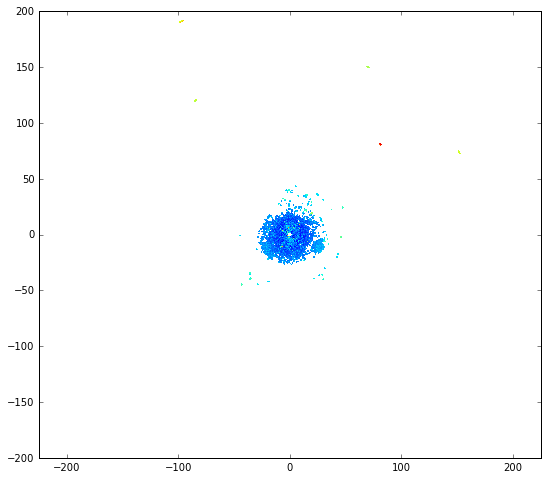

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.pcolormesh(x, y, ref[0])
ax.set_aspect('equal', 'datalim')
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)